In [57]:
#Import required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#read the excel sheet as dataframe

sprocket_central = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

df_transactions = pd.read_excel(sprocket_central, 'Transactions', header=1)

df_newcustomers = pd.read_excel(sprocket_central, 'NewCustomerList', header=1)

df_demographic = pd.read_excel(sprocket_central, 'CustomerDemographic', header=1)

df_address = pd.read_excel(sprocket_central, 'CustomerAddress', header=1)


# Transactions

In [6]:
df_transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [106]:
df = df_transactions.copy()

### Null values

In [28]:
#Null values
df.isnull().sum()

#there are significant null values

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [31]:
#Percentage of null values in each variable

df.isnull().sum()/len(df) * 100
#There are max number of null values in Online order variable i.e, 1.8%

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

### Duplicate values/records

In [108]:
df.duplicated().value_counts()

#There are no duplicate records

False    20000
dtype: int64

### Product_id

In [9]:
#Total number of unique products sold = 101
df['product_id'].nunique()

101

In [14]:
#The product which was sold the most and the least

print('Product ID which was sold most :', df['product_id'].value_counts().nlargest(1))

print('\nProduct ID which was sold the least :', df['product_id'].value_counts().nsmallest(1))

Product ID which was sold most : 0    1378
Name: product_id, dtype: int64

Product ID which was sold the least : 47    121
Name: product_id, dtype: int64


<AxesSubplot:ylabel='Frequency'>

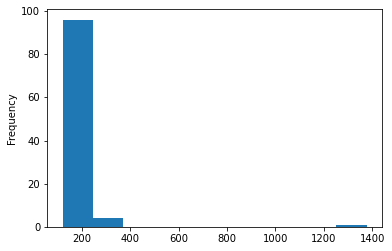

In [16]:
df['product_id'].value_counts().plot(kind='hist')

In [17]:
df['product_id'].value_counts()

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

### Transaction ID

In [20]:
#There are 20000 transactions recorded
df['transaction_id'].nunique()

20000

### Customer ID

In [21]:
#There are 3494 unique customers
df['customer_id'].nunique()

3494

In [23]:
#The customer who has purchased the most

print('Customer ID who has purchased the most :', df['customer_id'].value_counts().nlargest(1))

#The customers purchased for least number of times is 1

Customer ID who has purchased the most : 2183    14
Name: customer_id, dtype: int64


### Transaction Date

In [25]:
#transaction date

df['transaction_date'].min(), df['transaction_date'].max()
#The transactions made in the year 2017 has been recorded and provided to us.### Transaction ID

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### Online Order

In [32]:
#Online Order

df['online_order'].value_counts()
#The data is almost balanced but there are outliers

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [33]:
df['online_order'].value_counts(normalize=True)

1.0    0.500458
0.0    0.499542
Name: online_order, dtype: float64

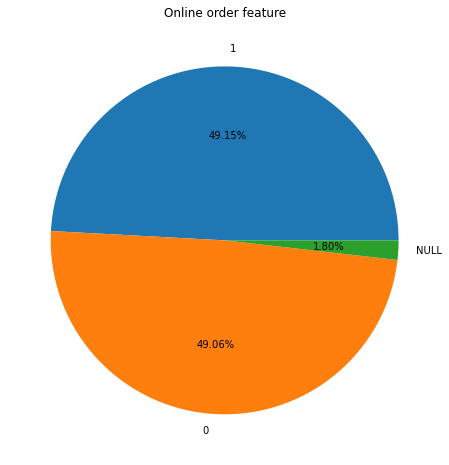

In [40]:
plt.figure(figsize=(12,8))
plt.pie(x=[9829, 9811, 360], labels=['1', '0', 'NULL'], autopct='%.2f%%')
plt.title('Online order feature')
plt.show()

### order_status

In [42]:
df['order_status'].value_counts()
#Very few products were cancelled, we need to know the reason behind this.

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

### brand

In [44]:
df['brand'].nunique()
#there are 6 types of brand available

6

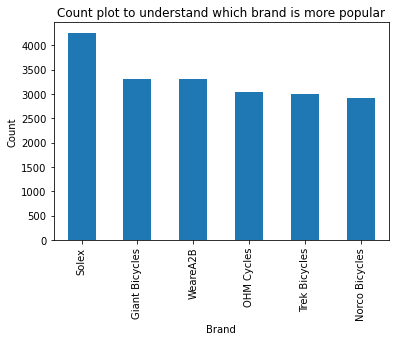

In [49]:
df['brand'].value_counts().plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count plot to understand which brand is more popular')
plt.show()

#We could visually see that Slox brand is more popular becuase around 4000 products were sold

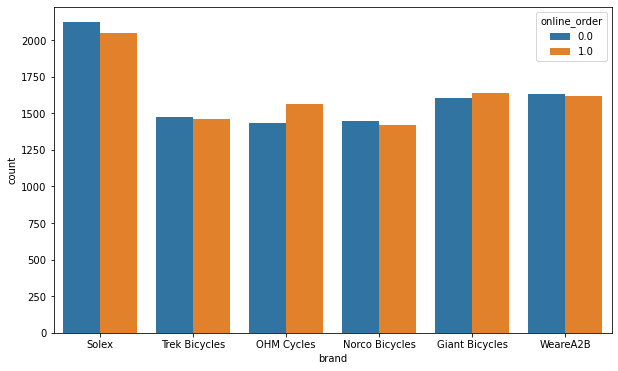

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(df['brand'], hue=df['online_order'])
plt.show()

#All the brands are equally purchased online and offline, there is no particular partern

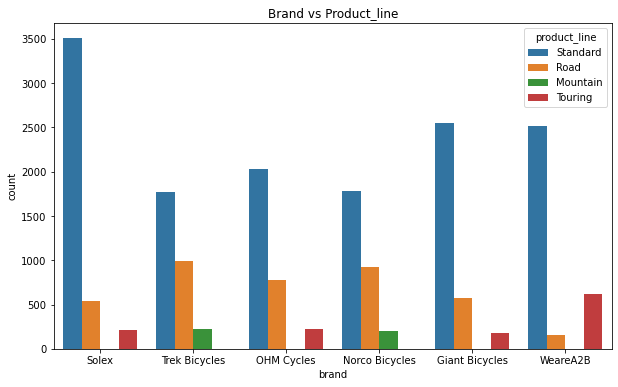

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(df['brand'], hue=df['product_line'])
plt.title('Brand vs Product_line')
plt.show()

#Solex brand is mostly popular for standard type of products
#Trek bicycles are leading company in Road sales

In [65]:
df['product_line'].value_counts(normalize=True) * 100

#Standard line was sold the most

Standard    71.585113
Road        20.047468
Touring      6.231379
Mountain     2.136040
Name: product_line, dtype: float64

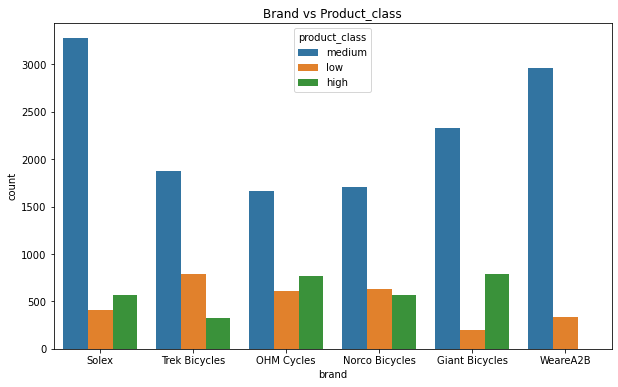

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(df['brand'], hue=df['product_class'])
plt.title('Brand vs Product_class')
plt.show()


In [68]:
df['product_class'].value_counts(normalize=True) * 100

#around 70% customers prefer medium class products, that is they are looking for good quality product with low price

medium    69.817704
high      15.214866
low       14.967429
Name: product_class, dtype: float64

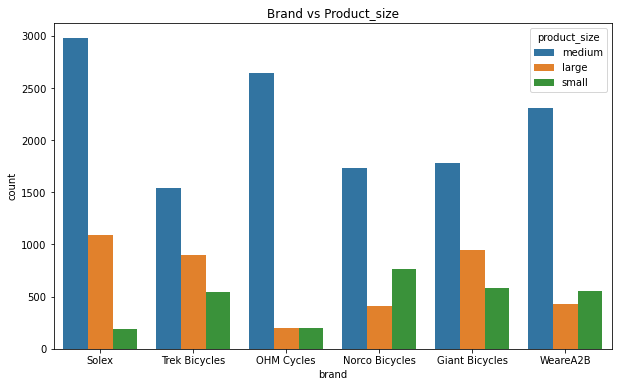

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(df['brand'], hue=df['product_size'])
plt.title('Brand vs Product_size')
plt.show()

In [75]:
df['product_size'].value_counts(normalize=True) * 100

#around 65% customers prefer medium sized products

medium    65.596122
large     20.077766
small     14.326112
Name: product_size, dtype: float64

### List price

<AxesSubplot:xlabel='list_price', ylabel='Density'>

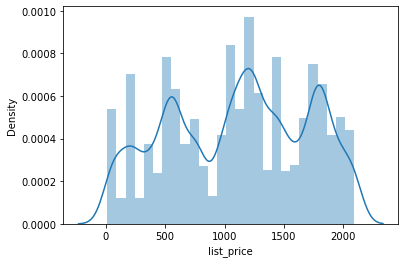

In [77]:
sns.distplot(df['list_price'])

#normally distibuted

In [78]:
df['list_price'].skew()

-0.1258038249318863

<AxesSubplot:xlabel='list_price'>

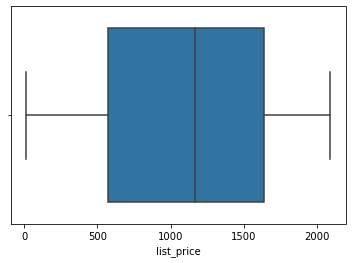

In [80]:
sns.boxplot(df['list_price'])

#There are no significant outliers

In [82]:
df.groupby('online_order')['list_price'].mean()
#Mean of the price sold in online and offline is almost equal

online_order
0.0    1107.288975
1.0    1106.945606
Name: list_price, dtype: float64

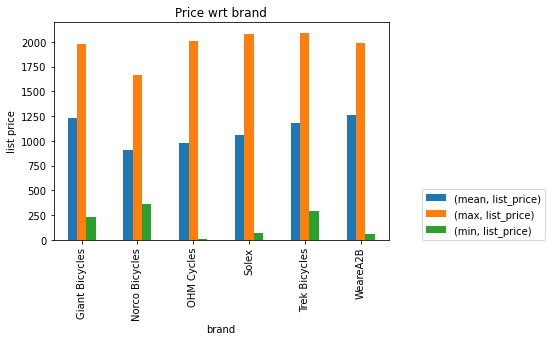

In [93]:
pd.pivot_table(data=df, values='list_price', index='brand', aggfunc=['mean', 'max', 'min']).plot(kind='bar')
plt.ylabel('list price')
plt.title('Price wrt brand')
plt.legend(loc=(1.1,0))
plt.show()

#Gaint bicycles has average price bit high

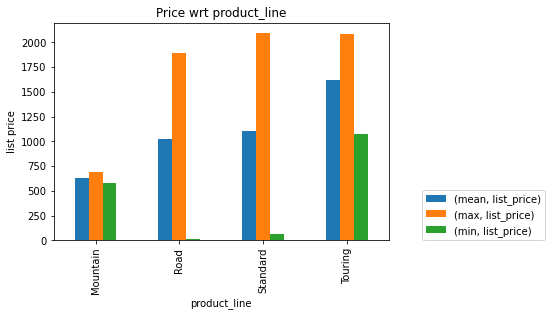

In [94]:
pd.pivot_table(data=df, values='list_price', index='product_line', aggfunc=['mean', 'max', 'min']).plot(kind='bar')
plt.ylabel('list price')
plt.title('Price wrt product_line')
plt.legend(loc=(1.1,0))
plt.show()


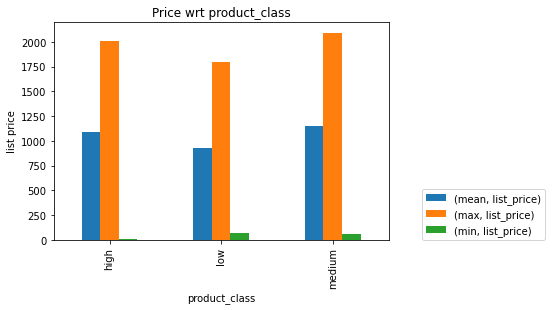

In [96]:
pd.pivot_table(data=df, values='list_price', index='product_class', aggfunc=['mean', 'max', 'min']).plot(kind='bar')
plt.ylabel('list price')
plt.title('Price wrt product_class')
plt.legend(loc=(1.1,0))
plt.show()

#Even tough the average price of medium class is high, people have purchased the same

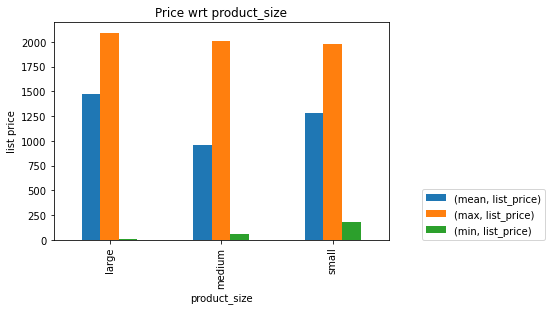

In [98]:
pd.pivot_table(data=df, values='list_price', index='product_size', aggfunc=['mean', 'max', 'min']).plot(kind='bar')
plt.ylabel('list price')
plt.title('Price wrt product_size')
plt.legend(loc=(1.1,0))
plt.show()

In [99]:
#product_first_sold_date ==> feature name says about the date but the values in it is completely different

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

# New customers data

In [109]:
df = df_newcustomers.copy()

In [102]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

### Null values

In [110]:
#Null values
df.isnull().sum()

#there are significant null values

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [111]:
#Percentage of null values in each variable

df.isnull().sum()/len(df) * 100
#There are max number of null values in job_industry_category variable i.e, 16.5%

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Unnamed: 16                             0.0
Unnamed: 17                             0.0
Unnamed: 18                             0.0
Unnamed: 19                             0.0
Unnamed: 20                             0.0
Rank                                    0.0
Value                           

### Duplicate values/records

In [113]:
df.duplicated().value_counts()

#There are no duplicate records

False    1000
dtype: int64

In [116]:
#there are 1000 unique customers

### gender

In [118]:
df['gender'].value_counts()
#There are slightly more female new customers

Female    513
Male      470
U          17
Name: gender, dtype: int64

### past_3_years_bike_related_purchases

In [122]:
df[df['past_3_years_bike_related_purchases'] == df['past_3_years_bike_related_purchases'].max()]

#There 9 customers who have purchased more bike related items in last 3 years == 99

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
168,Regine,Bownes,Female,99,1952-07-01,Senior Developer,Retail,Affluent Customer,N,No,...,VIC,Australia,9,0.58,0.580,0.72500,0.725000,166,166,1.175000
272,Theresa,Cowper,Female,99,1976-08-24,Accountant III,Manufacturing,Mass Customer,N,No,...,NSW,Australia,10,0.51,0.510,0.63750,0.541875,271,271,1.060000
359,Pace,Clemonts,Male,99,1990-07-28,Media Manager IV,Retail,High Net Worth,N,No,...,VIC,Australia,7,0.79,0.790,0.98750,0.987500,358,358,0.980000
473,Irvine,Headon,Male,99,1956-04-21,Geologist III,IT,Affluent Customer,N,Yes,...,NSW,Australia,5,0.68,0.850,1.06250,1.062500,473,473,0.884000
546,Sammy,Borsi,Female,99,1972-04-27,Accountant III,Financial Services,Mass Customer,N,No,...,NSW,Australia,7,0.52,0.520,0.65000,0.552500,546,546,0.823437
677,Wylie,Huntingdon,Male,99,1966-08-11,VP Quality Control,Financial Services,Mass Customer,N,No,...,NSW,Australia,8,0.49,0.490,0.61250,0.520625,676,676,0.701250
705,Cissiee,Baylis,Female,99,1951-07-22,Cost Accountant,Financial Services,High Net Worth,N,No,...,NSW,Australia,11,0.44,0.440,0.55000,0.550000,700,700,0.687500
748,Mikol,Eck,Male,99,1975-07-25,VP Marketing,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,9,0.90,1.125,1.40625,1.195312,748,748,0.650781
866,Clarine,Piecha,Female,99,1964-12-07,Dental Hygienist,Health,High Net Worth,N,No,...,QLD,Australia,10,1.01,1.010,1.26250,1.262500,865,865,0.550000


In [124]:
df[df['past_3_years_bike_related_purchases'] == df['past_3_years_bike_related_purchases'].min()]

#There 9 customers who are yet to purchase any bike related product

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
76,Tobias,Woodhams,Male,0,1961-04-15,Research Nurse,Health,Mass Customer,N,No,...,NSW,Australia,9,1.00,1.0000,1.2500,1.062500,77,77,1.341406
113,Meriel,Tapp,Female,0,1995-08-13,VP Sales,IT,Mass Customer,N,No,...,VIC,Australia,2,1.08,1.0800,1.0800,0.918000,114,114,1.275000
225,Hersh,Stubbert,Male,0,2000-06-25,Technical Writer,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,8,1.04,1.3000,1.3000,1.105000,226,226,1.112500
322,Honey,Gosdin,Female,0,1981-11-29,Software Engineer I,Property,Mass Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.2375,1.051875,322,322,1.012500
451,Katie,Warhurst,Female,0,1991-12-02,Help Desk Operator,Retail,High Net Worth,N,Yes,...,VIC,Australia,5,0.59,0.7375,0.7375,0.737500,450,450,0.900000
545,Katy,Crooke,Female,0,1977-06-30,Food Chemist,Health,Mass Customer,N,No,...,NSW,Australia,12,0.50,0.5000,0.6250,0.531250,546,546,0.823437
798,Cherye,Stanfield,Female,0,1981-07-05,Environmental Tech,Manufacturing,Affluent Customer,N,No,...,NSW,Australia,9,0.64,0.6400,0.8000,0.800000,797,797,0.600000
904,Roth,Crum,U,0,NaT,Legal Assistant,IT,Mass Customer,N,No,...,NSW,Australia,6,0.62,0.6200,0.6200,0.527000,904,904,0.500000
960,Sonia,Dunstall,Female,0,1975-07-30,Accountant III,Financial Services,Mass Customer,N,No,...,NSW,Australia,9,1.00,1.0000,1.2500,1.062500,960,960,0.442000


### DOB

In [131]:
df['DOB'].max()
#The youngest customer is 19 years old

Timestamp('2002-02-27 00:00:00')

In [132]:
df['DOB'].min()
#The oldest customer is 83 years old

Timestamp('1938-06-08 00:00:00')

In [133]:
# we can create a new features with DOB as AGE

### job_title

In [135]:
df['job_title'].nunique()
#There are 184 diff kind of employees interested

184

In [137]:
df['job_title'].value_counts()
#There are more professors

Associate Professor              15
Software Consultant              14
Environmental Tech               14
Chief Design Engineer            13
Assistant Media Planner          12
                                 ..
Research Assistant I              1
Human Resources Assistant III     1
Media Manager I                   1
Statistician III                  1
Developer III                     1
Name: job_title, Length: 184, dtype: int64

### job_industry_category

In [138]:
df['job_industry_category'].nunique()

9

In [140]:
df['job_industry_category'].value_counts()

#Many customers are from Financial background

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [141]:
#There are more number of null values/ missing values in this features

### wealth_segment

In [143]:
df['wealth_segment'].nunique()

3

In [145]:
df['wealth_segment'].value_counts()

#There are many mew mass customers

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

### deceased_indicator

In [147]:
df['deceased_indicator'].nunique()

#we could remove this column, there is only one category

1

### owns_car

In [152]:
df['owns_car'].value_counts()
#Data is balanced

No     507
Yes    493
Name: owns_car, dtype: int64

### State

In [155]:
df['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

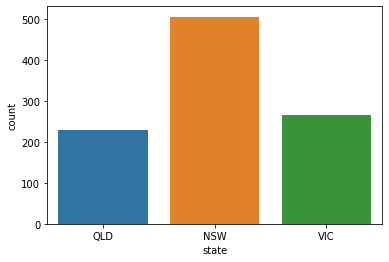

In [157]:
sns.countplot(df['state'])
plt.show()

#many new customers are from NSW

In [160]:
df['country'].unique()
#The data is taken from only Austrilia, we could remove this column

array(['Australia'], dtype=object)

### property_valuation

In [161]:
df['property_valuation'].value_counts()

9     173
8     162
7     138
10    116
6      70
11     62
5      57
4      53
3      51
12     46
2      42
1      30
Name: property_valuation, dtype: int64

<AxesSubplot:xlabel='property_valuation', ylabel='count'>

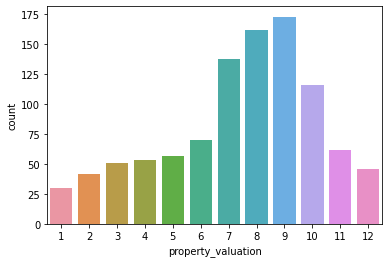

In [163]:
sns.countplot(df['property_valuation'])

#There are many new customers whose property is valued at 9

### Rank

In [169]:
df[df['Rank'] == 1]

#nly 3 customers are marked as RANK 1

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.70,0.8750,0.743750,1,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.89,1.1125,0.945625,1,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.01,1.0100,1.010000,1,1,1.71875


In [174]:
### address and demographic of customers is already analysed in above data

# *********************************THANK YOU*****************************